<a href="https://colab.research.google.com/github/nabeel-gulzar/linear_regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from math import floor
from matplotlib import pyplot as plt
%matplotlib inline

## 1. Linear Regression with one variable

Linear regression assumes a linear relationship between the input variables (X) and the single output variable (Y). More specifically, that output (Y) can be calculated from a linear combination of the input variables (X). When there is a single input variable, the method is referred to as a simple linear regression.

Now you will implement simple linear regression to predict profits for a food truck.

### 1.1 Load the dataset

The file `Data/ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss. 

In [ ]:
data = np.loadtxt(os.path.join('Data', 'ex1data.txt'), delimiter=',')
X, Y = data[:, 0], data[:, 1]

### 1.2 Plot the dataset
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Execute the next cell to visualize the data.

Text(0.5, 0, 'Population of City in 10,000s')

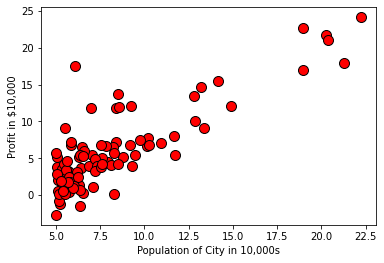

In [ ]:
plt.plot(X, Y, 'ro', ms=10, mec='k')
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')

### 1.3 Learn the parameters
In this part, we will fit the linear regression parameters $\theta$ to the food truck dataset using gradient descent.

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2 ------ (i)$$ 

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta_0 + \theta_1 x ------ (ii)$$

The parameters of our model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right) ------ (iii)$$

$$ \theta_1 = \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x^{(i)} ------ (iv)$$

With each step of gradient descent, our parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

Let's start by implementing the hypothesis $h_\theta(x)$.

In [ ]:
### GRADED FUNCTION ###
def predict(x, theta0, theta1):
    '''
    Calculates the hypothesis for any input sample `x` given the parameters `theta`.
    
    Arguments
    ---------
    x : float
        The input sample.
    
    theta0 : float
        The parameter for the regression function.
        
    theta1 : float
        The parameter for the regression function.
    
    Returns
    -------
    h_x : float
        The hypothesis for input sample.
    
    Hint(s)
    -------
    Compute equation (ii).
    '''
    h_x = 0.0    
    h_x = theta0 + (theta1*x)
    return h_x

Execute the next cell to verify your implementation.

In [ ]:
h_x = predict(x=2, theta0=1.0, theta1=1.0)
print('With x = 2, theta0 = 1.0, theta1 = 1.0\nPredicted Hypothesis h(x) = %.2f' % h_x)
print("Expected hypothesis h(x) = 3.00\n")

With x = 2, theta0 = 1.0, theta1 = 1.0
Predicted Hypothesis h(x) = 3.00
Expected hypothesis h(x) = 3.00



As we perform gradient descent to learn minimize the cost function  $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, we will implement a function to calculate  $J(\theta)$ so we can check the convergence of your gradient descent implementation.

In [ ]:
### GRADED FUNCTION ###
def computeCost(X, Y, theta0, theta1):
    '''
    Computes cost for linear regression. Computes the cost of using `theta` as the
    parameter for linear regression to fit the data points in `X` and `Y`.
    
    Arguments
    ---------
    X : array
        The input dataset of shape (m, ), where m is the number of training examples.
    
    Y : array
        The values of the function at each data point. This is a vector of
        shape (m, ), where m is the number of training examples.
    
    theta0 : float
        The parameter for the regression function.
        
    theta1 : float
        The parameter for the regression function.
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    Hint(s)
    -------
    Compute equation (i).
    '''
    # initialize some useful values
    m = Y.size  # number of training examples    
    J = 0

    for i in range(m):
        J += (predict(X[i], theta0, theta1)-Y[i])**2
    J /= 2*m   
    return J

Execute the next cell to verify your implementation.

In [ ]:
J = computeCost(X, Y, theta0=1.0, theta1=1.0)
print('With theta0 = 1.0, theta1 = 1.0\nPredicted cost J = %.2f' % J)
print("Expected cost J = 10.27\n")

With theta0 = 1.0, theta1 = 1.0
Predicted cost J = 10.27
Expected cost J = 10.27



Next, we will complete a function which implements gradient descent.

The starter code for the function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a `python` list.

In [ ]:
def gradientDescent(X, Y, alpha, n_epoch):
    """
    Performs gradient descent to learn `theta`. Updates `theta` by taking `n_epoch`
    gradient steps with learning rate `alpha`.
    
    Arguments
    ---------
    X : array
        The input dataset of shape (m, ), where m is the number of training examples.
    
    Y : array
        The values of the function at each data point. This is a vector of
        shape (m, ), where m is the number of training examples.
    
    alpha : float
        The learning rate.
    
    n_epoch : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta0 : float
        The parameter for the regression function.
        
    theta1 : float
        The parameter for the regression function.
    
    J : list
        A python list for the values of the cost function after each iteration.
    
    Hint(s)
    -------
    Compute equation (iii) and (iv).

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) here.
    """
    # initialize some useful values
    m = Y.size  # number of training examples
    J = list()  # list to store cost
    
    theta0 = 0.0
    theta1 = 0.0
    
    for epoch in range(n_epoch):
        step_theta0 = [(predict(X[i], theta0, theta1) - Y[i]) for i in range(m)]
        temp_theta0 = theta0 - ((alpha/m)*np.sum(step_theta0))
        step_theta1 = [step_theta0[i]*X[i] for i in range(m)]
        temp_theta1 = theta1 - ((alpha/m)*np.sum(step_theta1))

        theta0 = temp_theta0
        theta1 = temp_theta1
        J.append(computeCost(X, Y, theta0, theta1))
    return theta0, theta1, J

Execute the next cell to verify your implementation.

In [ ]:
n_epoch = 1500
alpha = 0.01

theta0, theta1, J = gradientDescent(X ,Y, alpha, n_epoch)
print('Predicted theta0 = %.4f, theta1 = %.4f, cost = %.4f' % (theta0, theta1, J[-1]))
print('Expected theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834')

Predicted theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834
Expected theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834


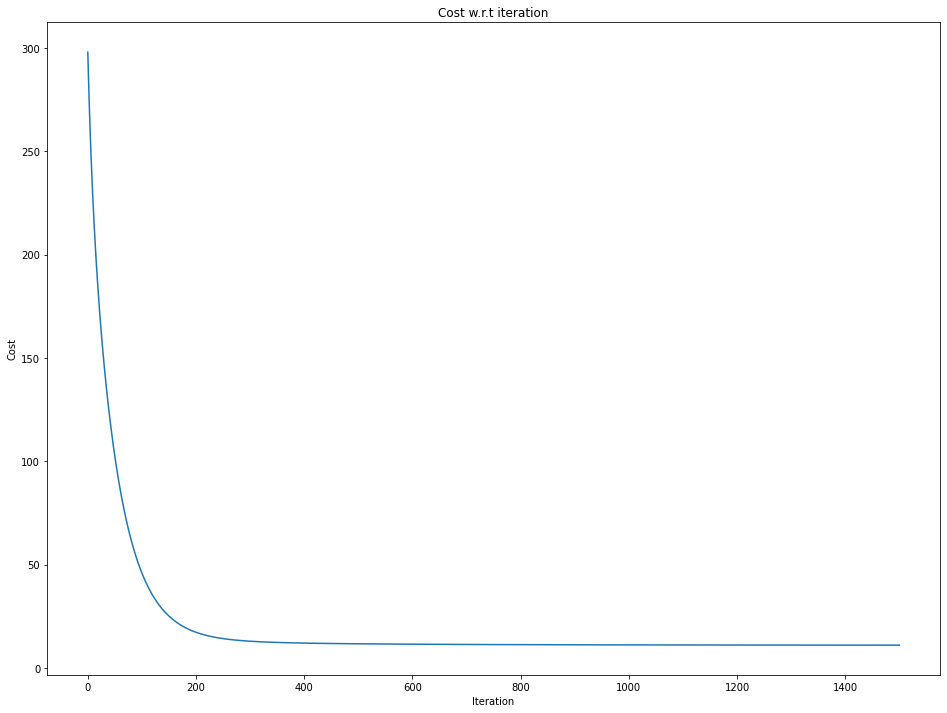

In [ ]:
# change in Cost after each iteration
def plot_cost(J, xlabel='Iteration', ylabel='Cost', title='Cost w.r.t iteration', xvalues=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 12)
    ax.set_title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    if xvalues is None:
        xvalues = [i for i in range(len(J))]
    xticks = list(set([floor(v) for v in xvalues]))
    if len(xticks) > 10:
        np.arange(min(xticks), max(xvalues)+1, len(xticks)//10)
    plt.xticks()

    plt.plot(xvalues, J, '-')
plot_cost(J)

### 1.4 Plot the linear fit

Use the learned parameters $\theta_j$ to plot the linear fit.

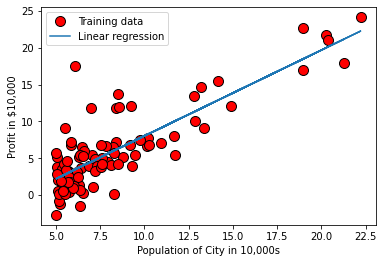

In [ ]:
h_x = list()
for x in X:
    h_x.append(predict(x, theta0, theta1))
plt.plot(X, Y, 'ro', ms=10, mec='k')
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.plot(X, h_x, '-')
plt.legend(['Training data', 'Linear regression'])

### 1.5 Make predictions

Use your learned parameters $\theta_j$ to make food truck profit predictions in areas with population of 40,000 and 65,000.

In [ ]:
print('For population = 40,000, predicted profit = $%.2f' % (predict(4, theta0, theta1)*10000))
print('For population = 65,000, predicted profit = $%.2f' % (predict(6.5, theta0, theta1)*10000))

For population = 40,000, predicted profit = $10351.58
For population = 65,000, predicted profit = $39510.64


## 2. Multivariate Linear Regression

Now, we will implement multivariate linear regression (from scratch) to predict the the median price of homes in a Boston suburb during the mid-1970s. To do this, you are given with the dataset that has 404 examples in the train set and 102 examples in test set. Each example has 13 input variables (features) and one output variable (price in $10,000s). Below is the description of input variables:

- Per capita crime rate.
- The proportion of residential land zoned for lots over 25,000 square feet.
- The proportion of non-retail business acres per town.
- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- Nitric oxides concentration (parts per 10 million).
- The average number of rooms per dwelling.
- The proportion of owner-occupied units built before 1940.
- Weighted distances to five Boston employment centers.
- Index of accessibility to radial highways.
- Full-value property-tax rate per $10,000.
- Pupil-teacher ratio by town.
- 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
- Percentage lower status of the population.

Each one of these input features is stored using a different scale. Some features are represented by a proportion between 0 and 1, other features are ranges between 1 and 12, some are ranges between 0 and 100, and so on. This is often the case with real-world data, and understanding how to explore and clean such data is an important skill to develop.

A common way to normalize features that use different scales and ranges is:

- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective standard deviations.

Note: We only use examples of the train set to estimate the mean and standard deviation.

In [ ]:
train_X = np.loadtxt(os.path.join('Data', 'ex2traindata.txt'))
train_Y = np.loadtxt(os.path.join('Data', 'ex2trainlabels.txt'))
test_X = np.loadtxt(os.path.join('Data', 'ex2testdata.txt'))
test_Y = np.loadtxt(os.path.join('Data', 'ex2testlabels.txt'))

In [ ]:
''' Start your code of part 2 from here, add the new code cells as per your requirement. '''
m_train = np.size(train_X, axis=0)
m_test = np.size(test_X, axis=0)

train_mean = train_X.mean(axis=0)
train_std = train_X.std(axis=0)

train_X = (train_X - train_mean)/train_std
test_X = (test_X - train_mean)/train_std

train_X = np.append(np.ones([m_train, 1]), train_X, axis=1)
test_X = np.append(np.ones([m_test, 1]), test_X, axis=1)

n = np.size(train_X, axis=1)

In [ ]:
def predictMV(X, thetas):
    return np.matmul(X, thetas)

In [ ]:
def computeMVCost(X, Y, thetas):
    '''
    Computes cost for linear regression. Computes the cost of using `theta` as the
    parameter for linear regression to fit the data points in `X` and `Y`.
    
    Arguments
    ---------
    X : matrix
        The input dataset of shape (m, n), where m is the number of training examples.
        and n in the number of features per example (including x0)
    
    Y : array
        The values of the function at each data point. This is a vector of
        shape (m, ), where m is the number of training examples.
    
    thetas : array<float>
        The parameter for the regression function.
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    '''
    m = Y.size
    error = predictMV(X, thetas)-Y
    cost = np.dot(error, error)/(2*m)    
    return cost

In [ ]:
def gradientDescentMV(X, Y, alpha, n_epoch):
    """
    Performs gradient descent to learn `thetas`. Updates `thetas` by taking `n_epoch`
    gradient steps with learning rate `alpha`.
    
    Arguments
    ---------
    X : matrix
        The input dataset of shape (m, n), where m is the number of training examples.
        and n in the number of features per example (including x0)
    
    Y : array
        The values of the function at each data point. This is a vector of
        shape (m, ), where m is the number of training examples.
    
    alpha : float
        The learning rate.
    
    n_epoch : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    thetas : array<float>
        The parameter for the regression function.
    
    J : list
        A python list for the values of the cost function after each iteration.
    """
    # initialize some useful values
    m = Y.size  # number of training examples
    J = list()  # list to store cost
    
    thetas = np.ones([np.size(X, axis=1)])
    J.append(computeMVCost(X, Y, thetas))
    iterations = 0
    for epoch in range(n_epoch):
        predicted = predictMV(X, thetas)
        cost = predicted - Y
        thetas_change = np.matmul(np.transpose(X), cost)
        temp_thetas = thetas - ((alpha/m)*thetas_change)
        mse = computeMVCost(X, Y, temp_thetas)
        thetas = temp_thetas
        J.append(mse)
        iteration = epoch
    return thetas, J

MSE on Train is: 11.07


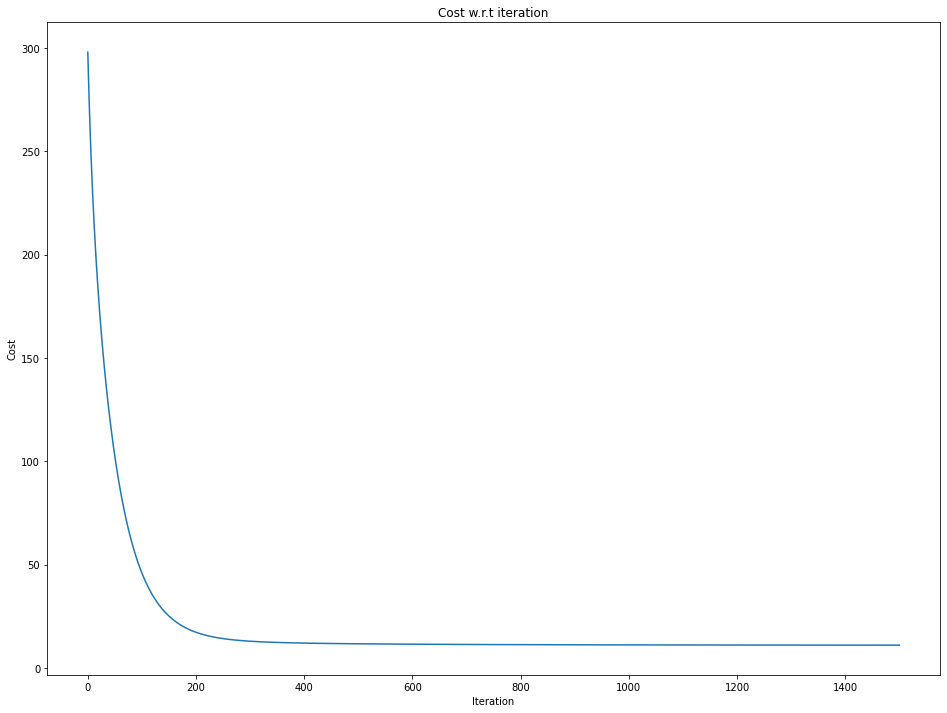

In [ ]:
thetas, J = gradientDescentMV(train_X, train_Y, alpha=0.01, n_epoch=1500)
print("MSE on Train is: {:.2f}".format(J[-1]))

plot_cost(J)

In [ ]:
test_cost = computeMVCost(test_X, test_Y, thetas)
print("MSE on Holdout is: {:.2f}".format(test_cost))

MSE on Holdout is: 11.40


## 3. Regularized Linear Regression

Now, we'll use the [scikit-learn](https://scikit-learn.org/stable/index.html) to implement [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge), [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso), [Elastic Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) and apply them to Boston house pricing dataset (provided in part 2). We will try out different values of regularization coefficient (known as alpha in scikit-learn) and use the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to report loss with each regression. Finally, plot the regularization coefficients alpha (x-axis) with learned parameters $\theta$ (y-axis) for Ridge and Lasso. Please read [this blog](https://scienceloft.com/technical/understanding-lasso-and-ridge-regression/) to get better understanding of the desired plots.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

In [ ]:
''' Start your code of part 3 from here, add the new code cells as per your requirement. '''

' Start your code of part 3 from here, add the new code cells as per your requirement. '

In [ ]:
def plot_coeffs(alphas, params, line_labels):
    x = np.array(alphas)
    features = np.transpose(params)
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 12)

    for i in range(np.size(features, axis=0)):
        ax.plot(alphas,features[i])

    ax.set_title('Feature Confidence w.r.t Regularization Coefficient')
    ax.legend(line_labels)
    ax.xaxis.set_label_text('Log Lambdas')
    ax.yaxis.set_label_text('Coefficients')
    plt.show()

In [ ]:
train_X = np.loadtxt(os.path.join('Data', 'ex2traindata.txt'))
train_Y = np.loadtxt(os.path.join('Data', 'ex2trainlabels.txt'))
test_X = np.loadtxt(os.path.join('Data', 'ex2testdata.txt'))
test_Y = np.loadtxt(os.path.join('Data', 'ex2testlabels.txt'))

feature_names = ['Per capita crime rate.',
'The proportion of residential land zoned for lots over 25,000 square feet.',
'The proportion of non-retail business acres per town.',
'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).',
'Nitric oxides concentration (parts per 10 million).',
'The average number of rooms per dwelling.',
'The proportion of owner-occupied units built before 1940.',
'Weighted distances to five Boston employment centers.',
'Index of accessibility to radial highways.',
'Full-value property-tax rate per $10,000.',
'Pupil-teacher ratio by town.',
'1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.',
'Percentage lower status of the population.']

m_train = np.size(train_X, axis=0)
m_test = np.size(test_X, axis=0)

train_mean = train_X.mean(axis=0)
train_std = train_X.std(axis=0)

train_X = (train_X - train_mean)/train_std
test_X = (test_X - train_mean)/train_std

n = np.size(train_X, axis=1)

In [ ]:
lr = LinearRegression(normalize=False, copy_X=True, fit_intercept=True)
lr.fit(train_X, train_Y)
test_pred = lr.predict(test_X)
cost = mean_squared_error(test_Y, test_pred)
print("cost with linear regression using sklearn is={:.2f}".format(cost))

cost with linear regression using sklearn is=23.20


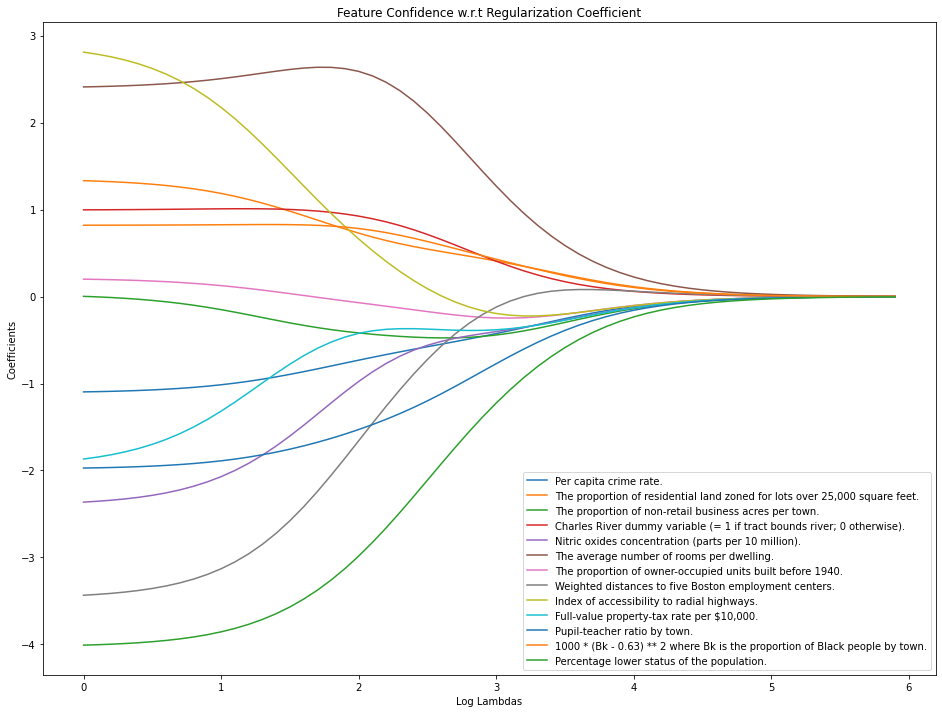

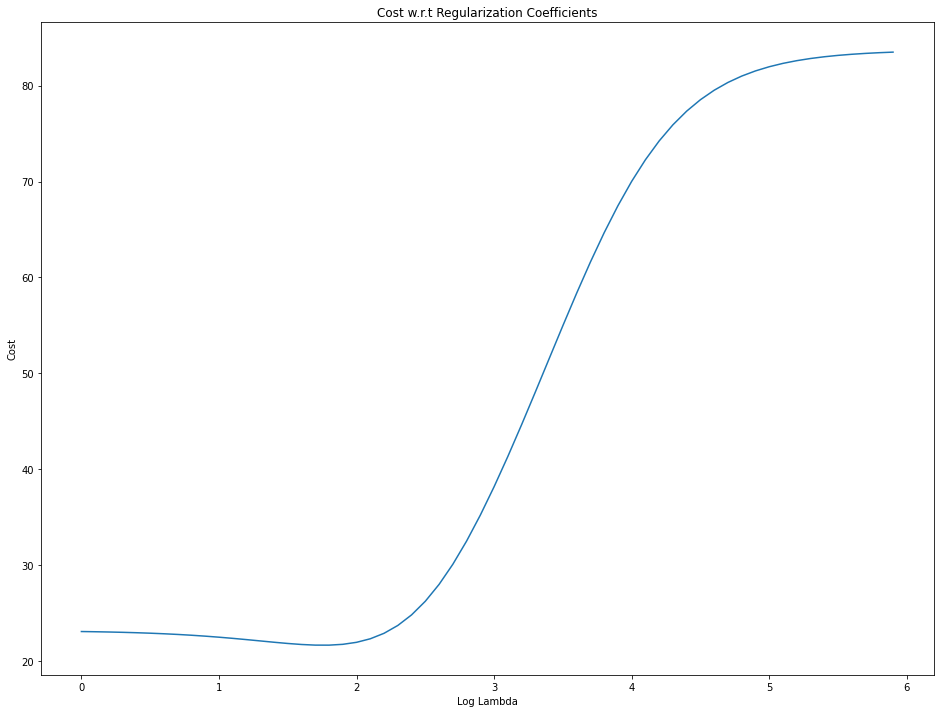

In [ ]:
alphas = np.arange(0, 6, .1)
costs = list()
params = list()
for alpha in alphas:
    r = Ridge(normalize=False, alpha=10**alpha)
    r.fit(train_X, train_Y)
    test_pred = r.predict(test_X)
    cost = mean_squared_error(test_Y, test_pred)
    params.append(r.coef_)
    costs.append(cost)
plot_coeffs(alphas, params, feature_names)
plot_cost(costs, xvalues=alphas, xlabel='Log Lambda', title='Cost w.r.t Regularization Coefficients')

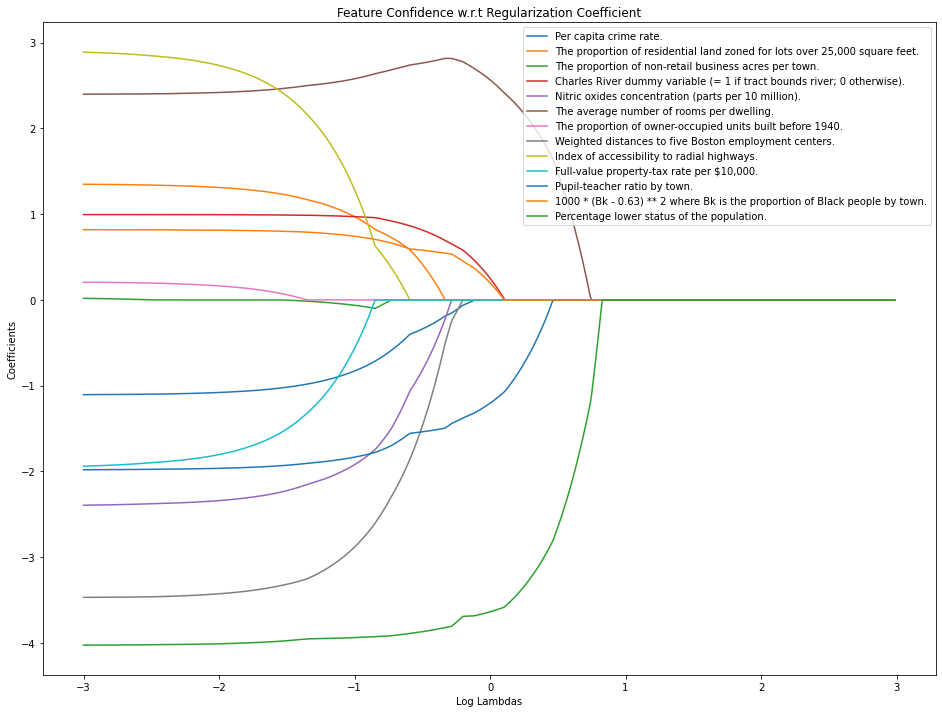

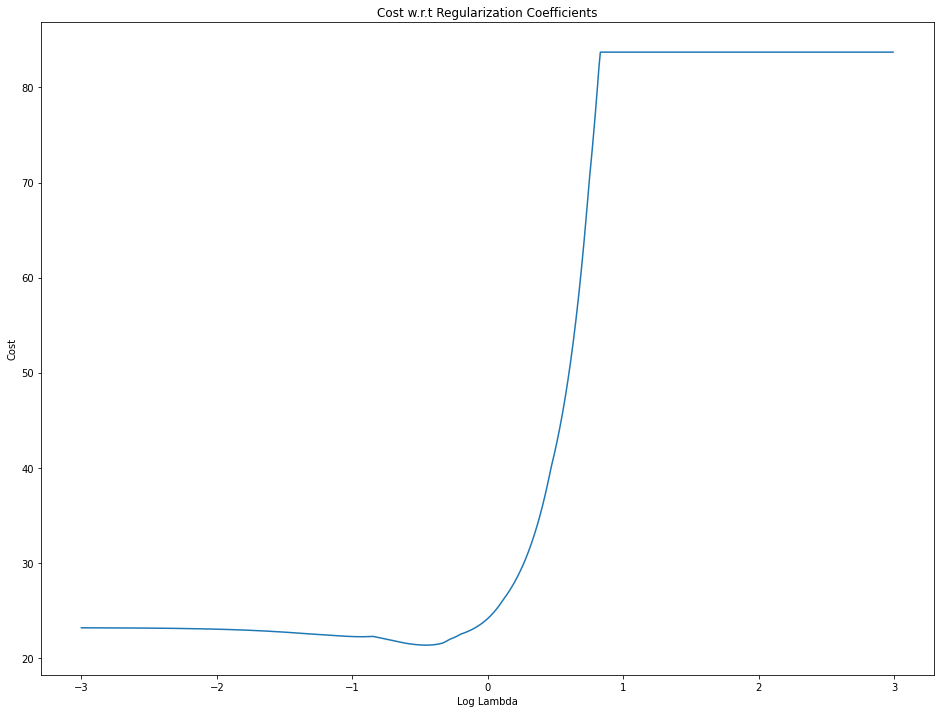

In [ ]:
alphas = np.arange(-3, 3, 0.01)
costs = list()
params = list()
for alpha in alphas:
    lasso = Lasso(alpha=10**alpha)
    lasso.fit(train_X, train_Y)
    test_pred = lasso.predict(test_X)
    cost = mean_squared_error(test_Y, test_pred)
    params.append(lasso.coef_)
    costs.append(cost)
plot_coeffs(alphas, params, feature_names)
plot_cost(costs, xvalues=alphas, xlabel='Log Lambda', title='Cost w.r.t Regularization Coefficients')

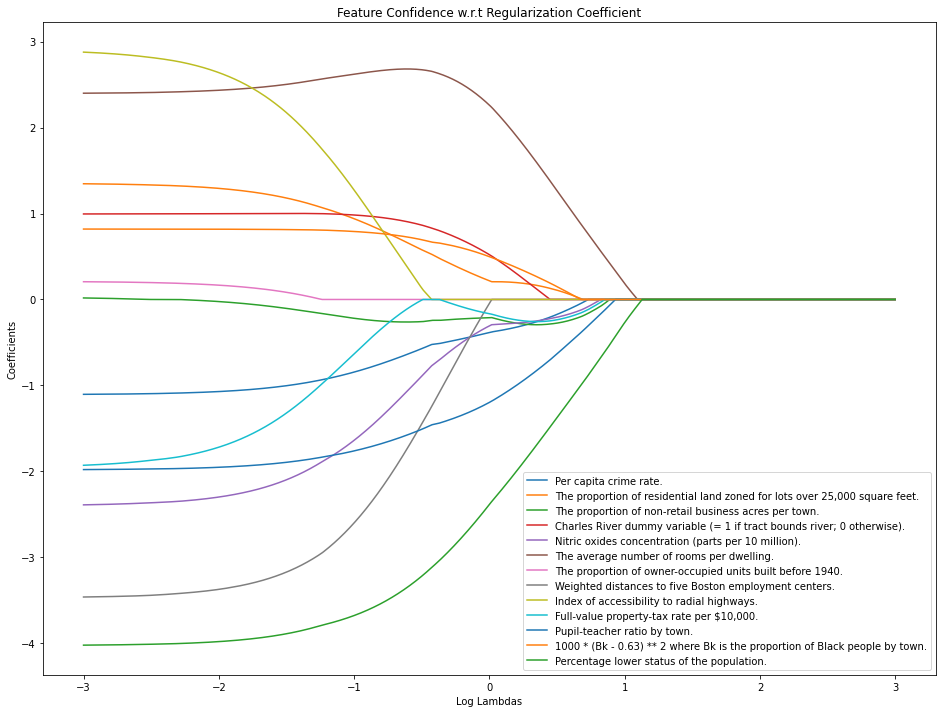

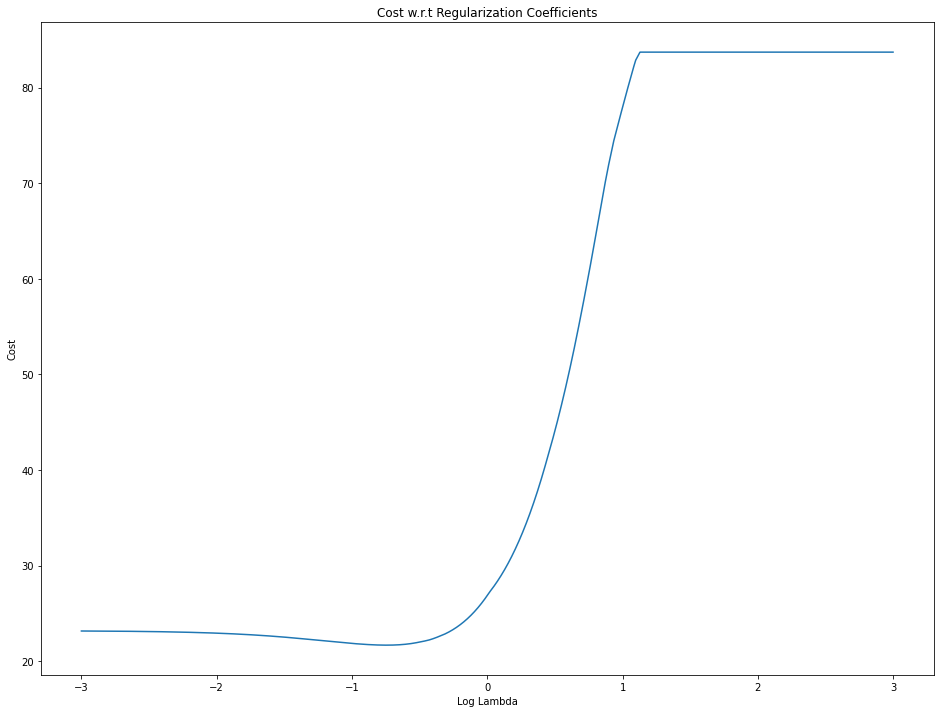

In [ ]:
alphas = np.arange(-3, 3, 0.001)
costs = list()
params = list()
for alpha in alphas:
    en = ElasticNet(alpha=10**alpha, copy_X=True)
    en.fit(train_X, train_Y)
    test_pred = en.predict(test_X)
    cost = mean_squared_error(test_Y, test_pred)
    costs.append(cost)
    params.append(en.coef_)
plot_coeffs(alphas, params, feature_names)
plot_cost(costs, xvalues=alphas, xlabel='Log Lambda', title='Cost w.r.t Regularization Coefficients')